### Importing libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### DataSet

In [150]:
data = pd.DataFrame(
    {
        'important_feature_poisson': np.random.poisson(5, 1000),
        'important_feature_dummy': np.random.binomial(1, 0.5, 1000),
        'random_feature_normal': np.random.normal(0, 100, 1000),
        'random_feature_dummy': np.random.binomial(1 , 0.5, 1000)
    }
)

data['Y'] = (
    np.random.normal(5, 3, 1000) * data['important_feature_poisson'] + 
    np.random.normal(10, 3, 1000) * data['important_feature_dummy']
)

In [151]:
data.head()

,important_feature_poisson,important_feature_dummy,random_feature_normal,random_feature_dummy,Y
0,4,0,-112.872783,0,33.743874
1,4,0,-127.768429,1,23.539051
2,5,0,6.548581,0,34.559953
3,5,1,59.797291,1,48.785742
4,6,1,112.165805,1,14.096609


In [152]:
data

,important_feature_poisson,important_feature_dummy,random_feature_normal,random_feature_dummy,Y
0,4,0,-112.872783,0,33.743874
1,4,0,-127.768429,1,23.539051
2,5,0,6.548581,0,34.559953
3,5,1,59.797291,1,48.785742
4,6,1,112.165805,1,14.096609
...,...,...,...,...,...
995,6,1,-11.691911,1,38.685107
996,7,0,2.747545,1,9.096228
997,5,1,142.300432,0,20.520437
998,7,0,-108.756965,0,7.209187


# Correlation Matrix

**Let's look at the correlation coefficients between the features in dataset**

In [153]:
correlations = data.corr()
print("Correlation Matrix:")
print(correlations)

Correlation Matrix:
                           important_feature_poisson  important_feature_dummy  \
important_feature_poisson                   1.000000                 0.054045   
important_feature_dummy                     0.054045                 1.000000   
random_feature_normal                       0.017777                 0.028520   
random_feature_dummy                        0.023791                 0.037624   
Y                                           0.561257                 0.311514   

                           random_feature_normal  random_feature_dummy  \
important_feature_poisson               0.017777              0.023791   
important_feature_dummy                 0.028520              0.037624   
random_feature_normal                   1.000000              0.011930   
random_feature_dummy                    0.011930              1.000000   
Y                                       0.003330              0.012846   

                                  Y  
important_

**From the heatmap, we can observe that the features "important_feature_poisson" and "important_feature_dummy" exhibit a positive correlation**

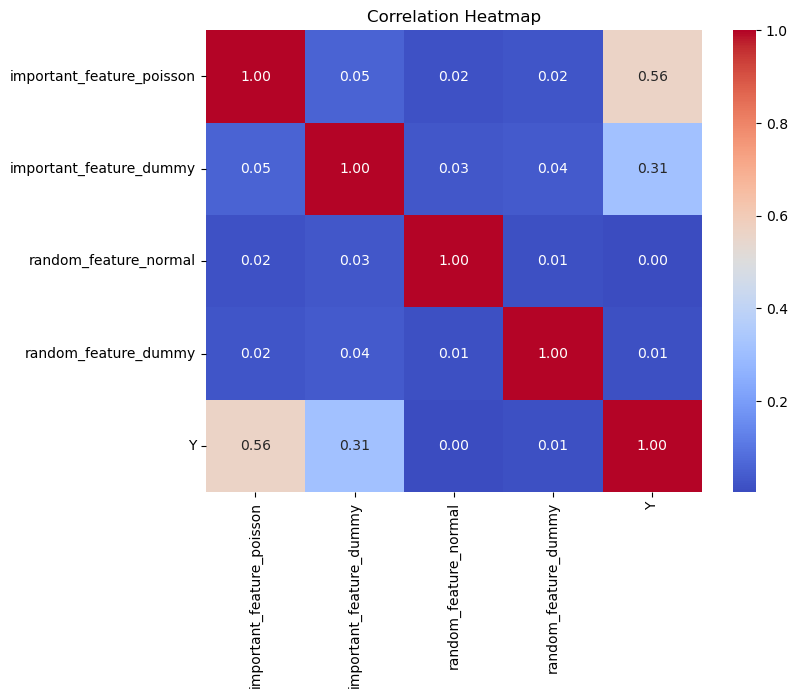

In [154]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Decision tree with default hyper parameters

In [155]:
# Creating a DataFrame from the dataset
df = pd.DataFrame(data)

# Defining features and target
X = df.drop("Y", axis=1)
y = df["Y"]

In [156]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor()
model = regr.fit(X, y)

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a Decision Tree Regressor with controlled hyperparameters to avoid overfitting
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

# Predicting on the test dataset
y_pred = dt_regressor.predict(X_test)

# Computing the Root Mean Squared Error (RMSE) for the test dataset
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)

RMSE: 22.560836831863973


With the default parameters, the accuracy is only around 75% and also the chances of overfitting is high, is not preferable or a good practice.

Now, Let's tune the Hyperparameters and check the how the model is performing and what are the important features the model is picking.

# Hypeparameter tuning

In [158]:
# Creating a DataFrame from the dataset
df = pd.DataFrame(data)

# Defining features and target
X = df.drop("Y", axis=1)
y = df["Y"]

#### Max_Depth

**Plotting the RMSE score with respect to the tree depth ranging from 1 to 32**

In [159]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import math

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

max_depths = np.arange(1, 33)  # This will create an array of integers from 1 to 32
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)
    
    train_results.append(train_rmse)
    test_results.append(test_rmse)

Text(0.5, 0, 'Tree depth')

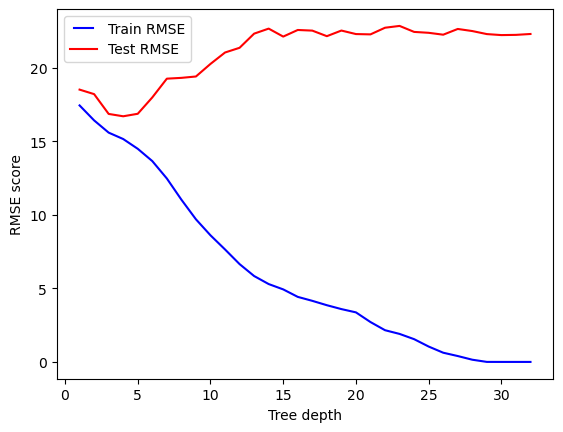

In [160]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('Tree depth')

A tree_depth of 4 yields a favorable RMSE score.

#### min_samples_split

In [161]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeRegressor(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)

    train_results.append(train_rmse)
    test_results.append(test_rmse)

Text(0.5, 0, 'min samples split')

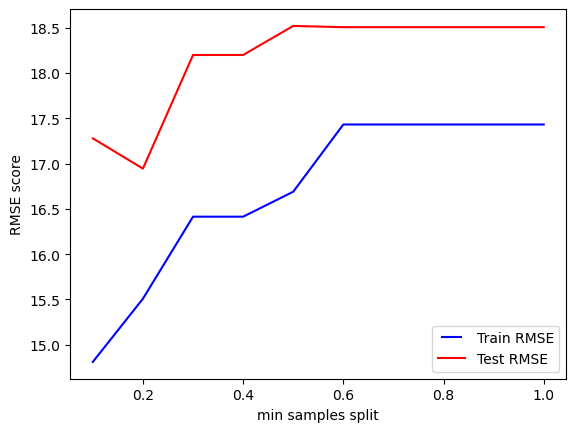

In [162]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('min samples split')

Choosing min_samples_split as 2 which looks optimal

#### min_samples_leafs

In [163]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

n_samples = len(X_train)  # Total number of samples in the training set
for min_samples_leaf in min_samples_leafs:
    min_samples_leaf_int = int(min_samples_leaf * n_samples)  # Convert proportion to integer
    dt = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf_int)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)

    train_results.append(train_rmse)
    test_results.append(test_rmse)

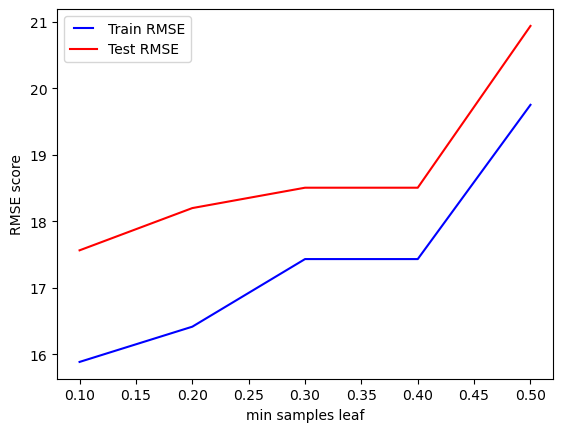

In [164]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('min samples leaf')
plt.show()

Choosing min_samples_split as 3 which looks optimal

## feature_importances_

**Let's check the feature_importances_ with a default DecisionTreeRegressor()**

In [165]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor()
model = regr.fit(X, y)

Text(0.5, 0, 'Relative Importance')

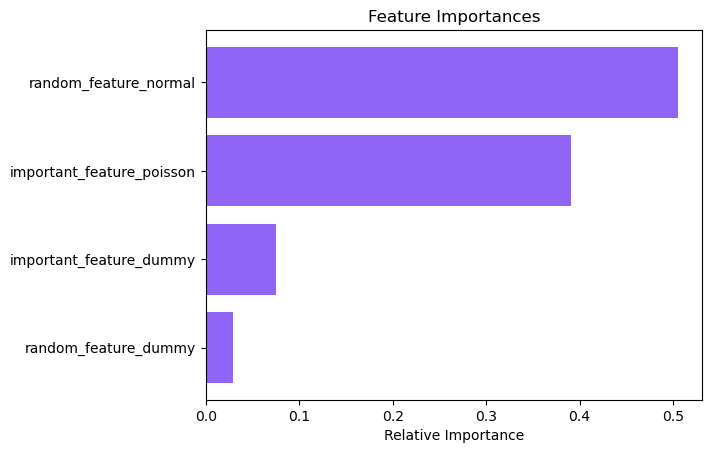

In [166]:
features = X.columns.values
importances = regr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

The random normal feature is ranked as the most important feature, even though we know for a fact that this feature has no impact on Y

**Now let's employ the Hyper Parameters that we decided from the above Graphs for each parameter to the DecisionTreeRegressor and check the feature_importances_**

In [167]:
regr = DecisionTreeRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=3, random_state=42)
model = regr.fit(X, y)

Text(0.5, 0, 'Relative Importance')

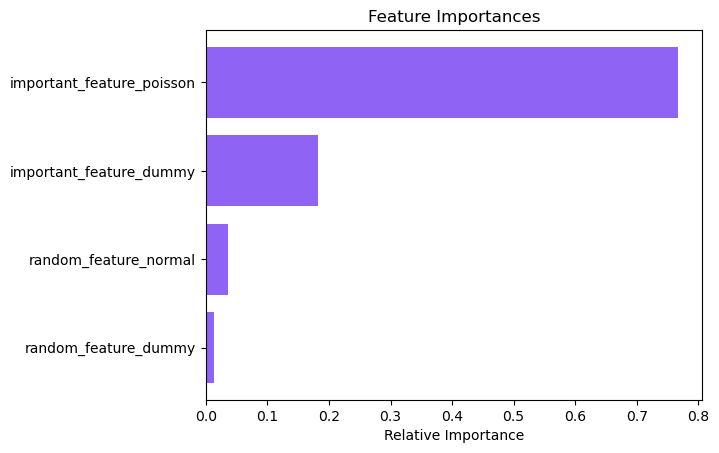

In [168]:
features = X.columns.values
importances = regr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8f63f4', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

**Great!! Achieved model perfection through hyperparameter tuning that actually select important features relevant to the output feature Y.**

# Decision Tree:

[Text(0.5, 0.9, 'x[0] <= 4.5\nsquared_error = 400.091\nsamples = 1000\nvalue = 30.073'),
 Text(0.25, 0.7, 'x[0] <= 3.5\nsquared_error = 146.197\nsamples = 460\nvalue = 19.878'),
 Text(0.125, 0.5, 'x[1] <= 0.5\nsquared_error = 92.084\nsamples = 276\nvalue = 16.1'),
 Text(0.0625, 0.3, 'x[0] <= 2.5\nsquared_error = 65.232\nsamples = 150\nvalue = 11.76'),
 Text(0.03125, 0.1, 'squared_error = 28.246\nsamples = 67\nvalue = 8.003'),
 Text(0.09375, 0.1, 'squared_error = 74.503\nsamples = 83\nvalue = 14.792'),
 Text(0.1875, 0.3, 'x[0] <= 2.5\nsquared_error = 74.926\nsamples = 126\nvalue = 21.267'),
 Text(0.15625, 0.1, 'squared_error = 36.38\nsamples = 69\nvalue = 17.94'),
 Text(0.21875, 0.1, 'squared_error = 91.97\nsamples = 57\nvalue = 25.294'),
 Text(0.375, 0.5, 'x[1] <= 0.5\nsquared_error = 173.841\nsamples = 184\nvalue = 25.545'),
 Text(0.3125, 0.3, 'x[2] <= -170.829\nsquared_error = 151.232\nsamples = 100\nvalue = 21.554'),
 Text(0.28125, 0.1, 'squared_error = 250.687\nsamples = 6\nvalue =

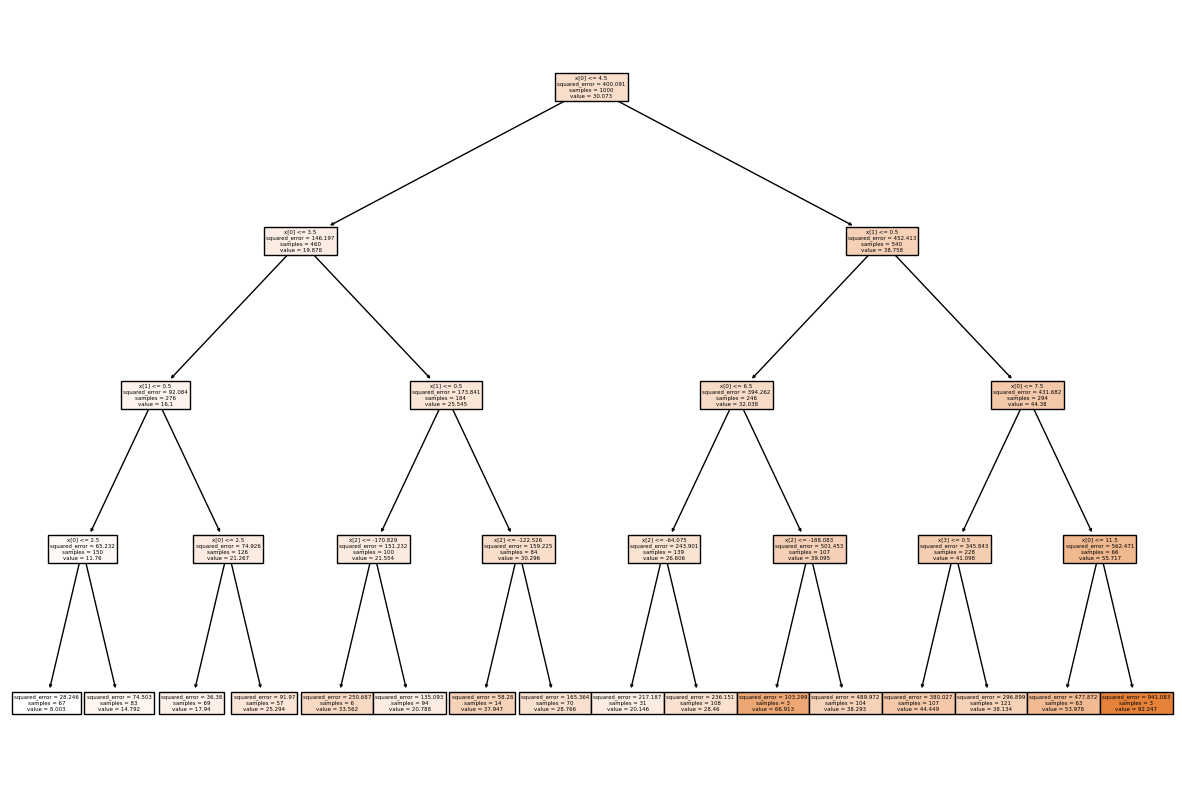

In [169]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(regr, filled=True)

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a Decision Tree Regressor with controlled hyperparameters to avoid overfitting
dt_regressor = DecisionTreeRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=3, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predicting on the test dataset
y_pred = dt_regressor.predict(X_test)

# Computing the Root Mean Squared Error (RMSE) for the test dataset
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)

RMSE: 16.018477477440282


**Model Accuracy: Approximately 84%**

Let's look at the Comparison graph of Test Values and Predicted Values

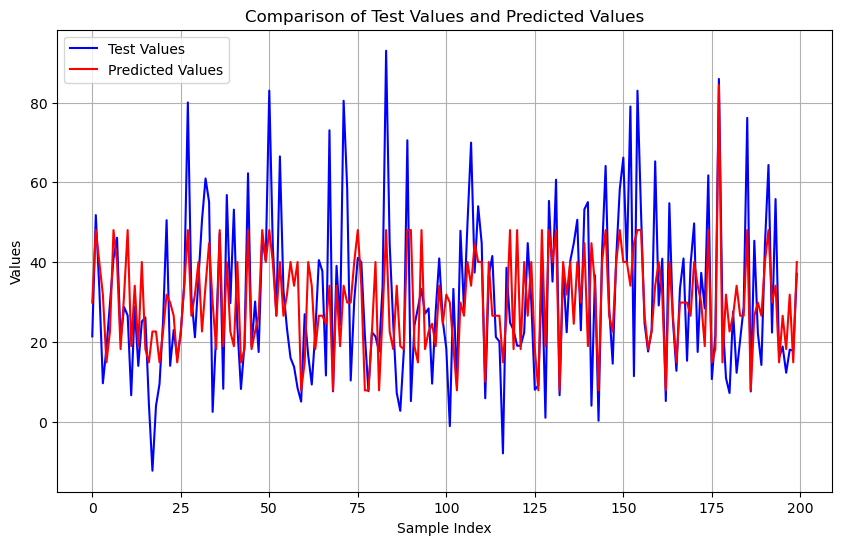

In [171]:
import numpy as np

# Converting to NumPy array for easier plotting
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# index for plotting
index = np.arange(len(y_test_array))

# Plotting the test values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(index, y_test_array, label='Test Values', color='blue')
plt.plot(index, y_pred_array, label='Predicted Values', color='red')
plt.title('Comparison of Test Values and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

The pattern of Predicted vaules are almost close to the Test values

# Bootstrap Aggregated Forest Model

In [172]:
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
import numpy as np
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of folds for k-fold cross-validation
n_splits = 5

# Initialize KFold
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Base estimator
base_estimator = DecisionTreeRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=3, random_state=42)

# Number of trees in the BaggingRegressor
num_trees = 10

# Initialize the BaggingRegressor model
model = BaggingRegressor(estimator=base_estimator, n_estimators=num_trees, random_state=42)

# empty list to store RMSE scores for each fold
rmse_scores = []

# k-fold cross-validation
for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)

    rmse_fold = sqrt(mean_squared_error(y_val_fold, y_pred_fold))
    rmse_scores.append(rmse_fold)

# Converting the list of RMSE scores to a NumPy array and calculate mean RMSE
rmse_scores = np.array(rmse_scores)
mean_rmse = rmse_scores.mean()

# Print the RMSE scores for each fold and the mean RMSE
print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE:", mean_rmse)

RMSE scores for each fold: [14.20948978 20.52990882 15.35908333 14.96967197 15.66002576]
Mean RMSE: 16.145635932972315


In [173]:
# Fit the model to the entire training dataset
model.fit(X_train, y_train)

# Predicting the target values for the test dataset
y_test_pred = model.predict(X_test)
# calculate RMSE
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

# Print the RMSE for the test dataset
print("RMSE on Test Dataset:", rmse_test)

RMSE on Test Dataset: 15.36732007157885


The bootstrap aggregated forest model has demonstrated a high level of accuracy, achieving an impressive 86% at its peak and maintaining a minimum accuracy of 84%. 